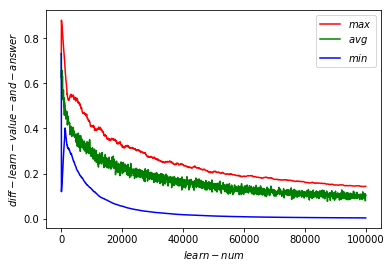

In [44]:
import numpy as np
% matplotlib inline
from matplotlib import pyplot as plt


class Neuron():
    """Learning 'logical and'
    """
    def __init__(self, input_num):
        """init
        param: input_num (integer): input number
        """
        # Learning rate
        self._rate = 0.01
        # weight to input values default
        self._weight = np.array(np.round(np.random.rand(input_num)))
        # bias value
        self._bias = 1.0
        # output value
        self._y = None

    def learn(self, x):
        """Learning
        param: x (ndarray): input values
        return (float): Difference between output value and correct answer value after learning
        """
        # Get input value of correct answer derived from input value
        t = self._get_correct(x)
        # Calculate the state of neuron by input values(x) and weight(_weight) and(_bias)
        s = self._weight.dot(x) + self._bias
        # Calculate the output value by the state of neuron(0~1)
        self._y = 1 / (1 + np.exp(-s))

        # differential　the state of neuron
        diff_y = self._y - t
        # differential　output value
        diff_state = self._y * (1 - self._y)
        #　common differential　 calculation
        diff_common = diff_y * diff_state
        # learning weight
        self._weight -= self._rate * diff_common * x
        # learning bias
        self._bias -= self._rate * diff_common

        # Difference between output value and correct answer value after learning
        return np.abs(self._y - t)

    def _get_correct(self, x):
        """Get input value of correct answer derived from input value
        param: x (ndarray): input values
        return (integer): 0 or 1
        """
        return 0 if (x[x == 0.0].size) else 1


# input num
input_num = 2
# learn loop num
learn_num = 100000
# result output interval
interval = 50

# learning
n = Neuron(input_num)
output_x = []
tmp_y = []
output_y_max = []
output_y_avg = []
output_y_min = []
for i in range(0, learn_num):
    # input from random　combination　(0,0 or 0,1 or 1,0 or 1,1)
    x = np.array(np.round(np.random.rand(input_num)))
    diff = n.learn(x)
    tmp_y.append(diff)
    if i % interval == 0:
        # Average, max, min value for each set number of loops
        output_y_max.append(max(tmp_y))
        output_y_avg.append(sum(tmp_y) / len(tmp_y))
        output_y_min.append(min(tmp_y))
        tmp_y = []
        output_x.append(i+1)

# output
line_max, line_avg, line_min = plt.plot(
    output_x, output_y_max, 'r-', 
    output_x, output_y_avg, 'g-', 
    output_x, output_y_min, 'b-'
)
plt.legend((line_max, line_avg, line_min), ('$max$', '$avg$', '$min$'))
plt.xlabel('$learn-num$')
plt.ylabel('$diff-learn-value-and-answer$')
plt.show()